# Principal Component Analysis

-----
-----

**GOAL:** The objective of this notebook is to use Principal Component Analysis (PCA) to determine which handwritten digits are most differentiated. This is achieved by evaluating the principal components of the dataset and graphically representing them. Specifically, the notebook performs PCA for dimensions of 2 and 3 and visualizes the results using three-dimensional plots.

-----
-----

# Data

**Data Set Information from Original Authors:**

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

**Source:** https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%matplotlib inline

In [2]:
sns.set()

In [3]:
digits = pd.read_csv('digits.csv')

In [4]:
digits.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [5]:
pixels = digits.drop('number_label',axis=1)

In [6]:
pixels.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


**i will grab a single image row representation by getting the first row of the pixels DataFrame.**

In [7]:
single_image = pixels.iloc[0].to_numpy()

In [8]:
single_image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
single_image.shape

(64,)

In [10]:
single_image = single_image.reshape(8,8)

**I'm going to display the image**

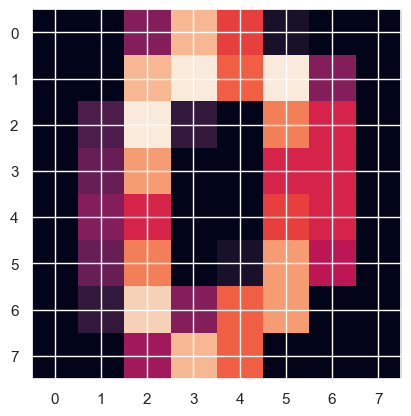

In [11]:
plt.imshow(single_image);

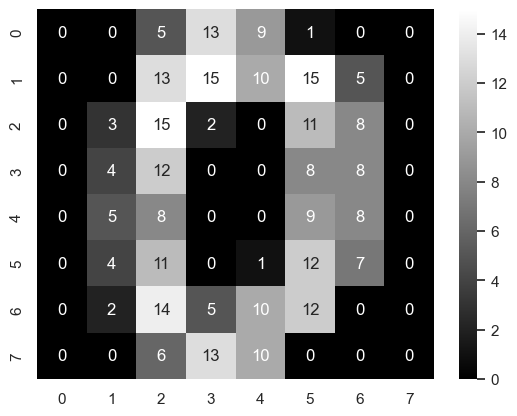

In [12]:
sns.heatmap(single_image, annot=True, cmap='gray');

------

## Scaling Data

In [13]:
scaler = StandardScaler()

In [14]:
scaled_pixels = scaler.fit_transform(pixels)

In [15]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

**I will perform a PCA on the scaled pixel dataset with 2 components.**

In [16]:
pca_model = PCA(n_components=2)

In [17]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

**Variance explained by 2 principal components**

In [18]:
print("Variance explained from two components:\n")
np.sum(pca_model.explained_variance_ratio_)

Variance explained from two components:



0.2159497049866804

**I will now create a scatterplot of the digits in the 2 dimensional PCA space.**

**i will also color the label based on the <span style="color:red">original</span> number_label column in the original dataset.**

In [19]:
pca_pixels[:,0]

pca_pixels[:,1]

array([-0.95448058,  0.92461582, -0.31718425, ..., -0.14790288,
       -0.38088934, -2.22754133])

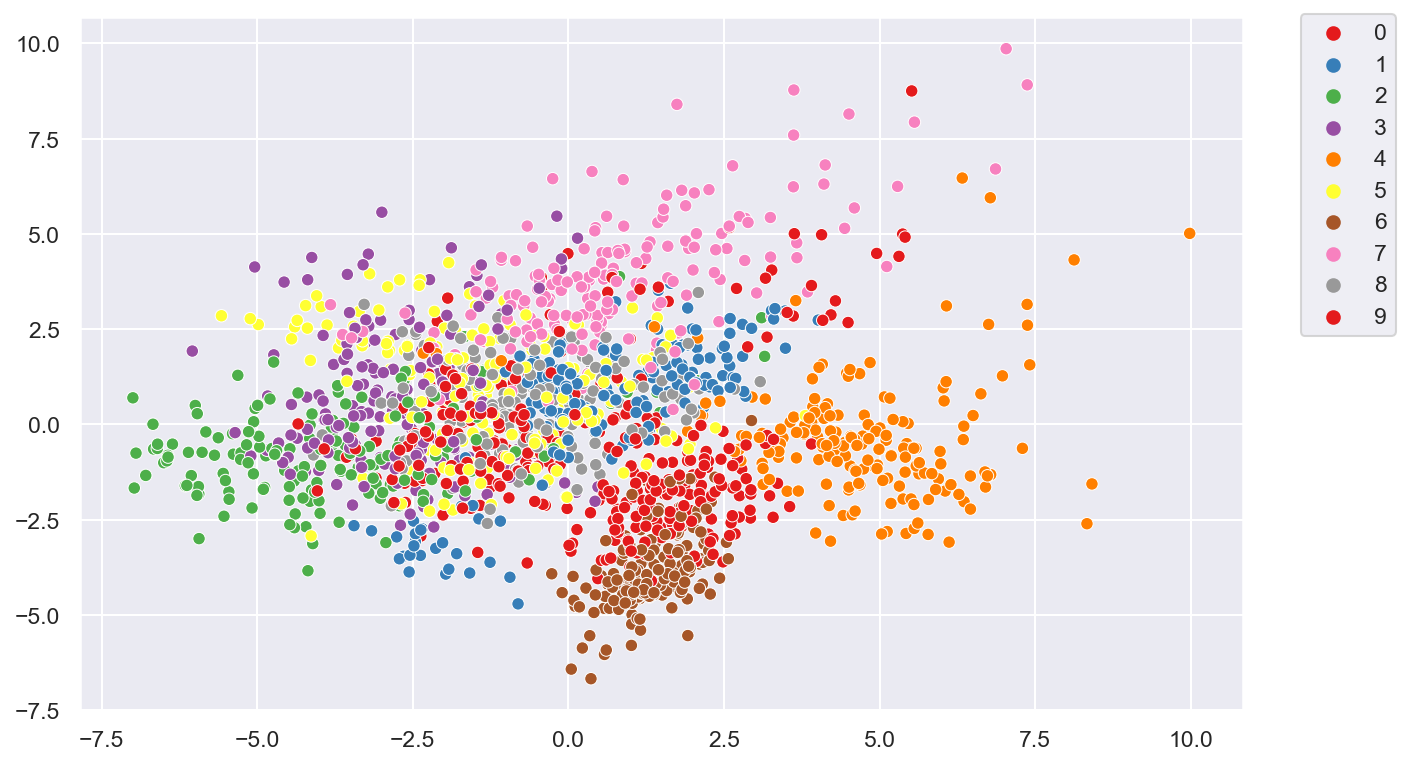

In [20]:
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(x=pca_pixels[:,0], y=pca_pixels[:,1], hue=labels, palette='Set1')
plt.legend(loc=(1.05, 0.54))
plt.show()

<p style="font-size: 18px; font-family: Baskerville;">from this chart it is easy to see that the number 
<span style="color: #FFA500; font-weight: bold">4</span> stands out as a separation from the others.
</p>

-----------
-----------

**I will now perform a PCA on the scaled pixel dataset with 3 components.**

In [21]:
pca_model = PCA(n_components=3)

In [22]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

In [23]:
print("Variance explained from three components:\n")
np.sum(pca_model.explained_variance_ratio_)

Variance explained from three components:



0.30039385390934026

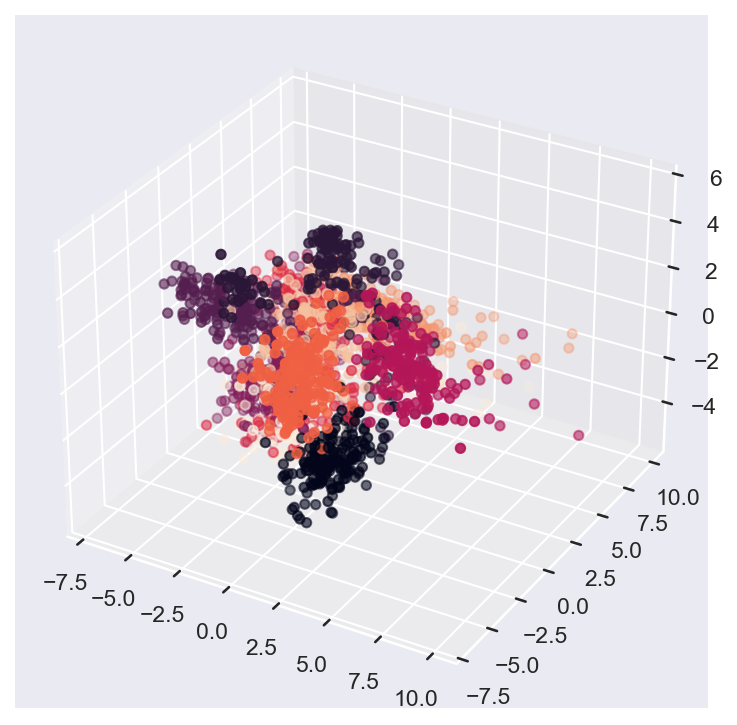

In [24]:
plt.figure(figsize=(6,6),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=digits['number_label']);